##### Credits

Creation date: 07/2023

author: Laetitia Lanfranchi

with many thanks to LeWagon and its wonderfull team

##### Initialization

Librairies

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# import ipywidgets # interactive graphs
# %matplotlib widget # enable interactivity in your notebook
# %matplotlib inline # get back to normal mode

# #Plotly: 3D & interactif graphs 
import plotly.express as px

# import plotly.graph_objects as go

Data

In [3]:
df_tips = sns.load_dataset('tips')
df_tips['axis_x'] = range(len(df_tips))
df_diam = sns.load_dataset("diamonds")
df_penguins = sns.load_dataset("penguins")

# Most common plots

## Hist & Box on numerical values

In [ ]:
metrics = df.select_dtypes(include=['float', 'int']).columns[0:4]

In [ ]:
##### Figure
mosaic = '''ABCD
            ABCD
            IJKL
            '''

mosaiq_hist = ['A', 'B', 'C', 'D']
mosaiq_box = ['I', 'J', 'K', 'L']

fig = plt.figure(constrained_layout=False, figsize=(10,3))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=1)
ax = fig.subplot_mosaic(mosaic)
fig.suptitle('Distribution of numerical features', color='#3f3f3f', y=1.05, fontweight='bold', fontsize='large')

##### Data
for i, metric in zip(mosaiq_hist, metrics):
    sns.histplot(data=df, x=metric, label=metrics, shrink=1, edgecolor=None, kde=True, ax=ax[i]);

for i, metric in zip(mosaiq_box, metrics):
    sns.boxplot(data=df, x=metric, orient='h', saturation=0.9, showmeans=True, meanprops=dict(markerfacecolor='w', markeredgecolor='w', marker='o'), medianprops=dict(color='w', alpha=1, linewidth=2), boxprops=dict(linewidth=False), 
                whiskerprops=dict(color='#151515', linewidth=1), capprops=dict(color='#151515', linewidth=1), showfliers=True, fliersize=3, flierprops=dict(markerfacecolor='#6a6a6a', markeredgecolor='#6a6a6a', marker='d'),
                ax=ax[i])

##### Style
for i in mosaiq_hist + mosaiq_box:
    ax[i].set_xlabel(ax[i].get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
    ax[i].set_ylabel('', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
    ax[i].grid(axis="both", lw=0.5, ls=':')
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines['left'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
    ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

# Figure

## One axe

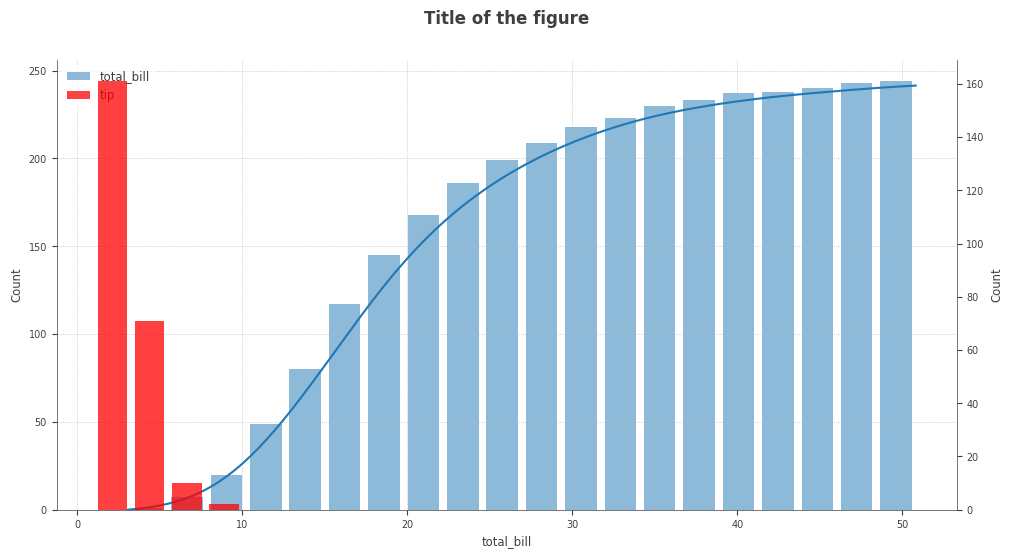

In [4]:
##### Figure
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Title of the figure',color='#3f3f3f', y=1.05, fontweight='bold', fontsize='large')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)

##### Data
sns.histplot(data=df_tips['total_bill'], kde=True, bins=20, cumulative=True, shrink=.8, label="total_bill", edgecolor=None, ax=ax);
ax2 = ax.twinx()
sns.histplot(data=df_tips['tip'], kde=False, bins=4, cumulative=False, shrink=.8, color='red', label="tip", edgecolor=None, ax=ax2);

##### Style
ax.set_xlabel(ax.get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel(ax.get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
# ax.set_title('', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
# ax.set_xlim(xmin=None, xmax=None)
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth=0.5, position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')
ax2.set_ylabel(ax2.get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax2.spines[['bottom', 'top', 'left']].set_visible(False)
ax2.spines['right'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 1))
ax2.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')
h, l = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h+h2, l+l2, loc='best', fontsize='small', labelcolor='#3f3f3f').get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7);

## Mosaic

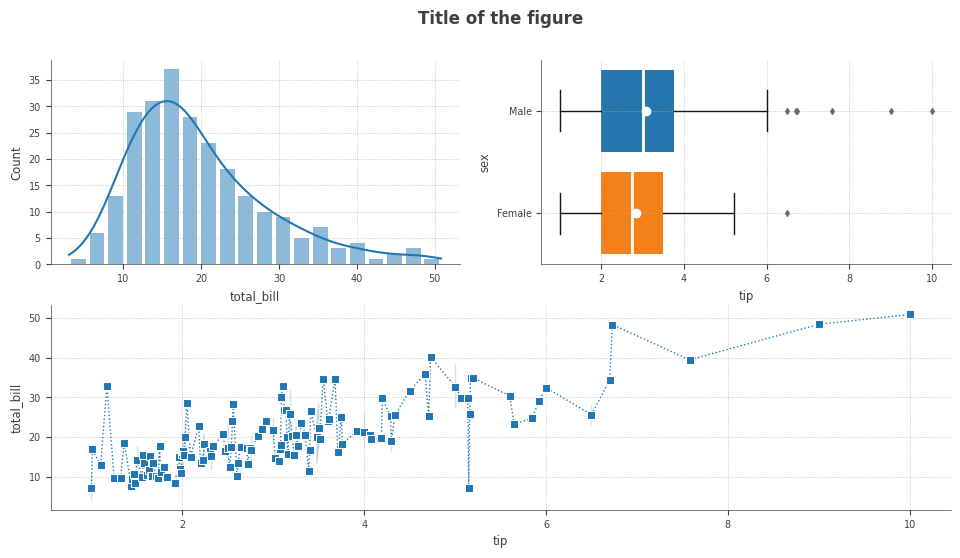

In [27]:
##### Figure
fig = plt.figure(figsize=(10,5))
fig.suptitle('Title of the figure',color='#3f3f3f', y=1.05, fontweight='bold', fontsize='large')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)
mosaic = '''AB
            CC
            '''
mosaiq_ = list(set([[*mosaic][i] for i in range(len(mosaic)) if [*mosaic][i].isalnum()]))
ax = fig.subplot_mosaic(mosaic)

##### Data
sns.histplot(data=df_tips, 
             x='total_bill',
             kde=True, bins=20, cumulative=False, 
             label="total_bill",
             shrink=0.8, edgecolor=None,
             ax=ax['A']);

sns.boxplot(data=df_tips, x="tip", y='sex',
            orient='h', saturation=0.9, 
            showmeans=True,
            meanprops=dict(markerfacecolor='w', markeredgecolor='w', marker='o'),
            medianprops=dict(color='w', alpha=1, linewidth=2),
            boxprops=dict(linewidth=False),
            whiskerprops=dict(color='#151515', linewidth=1),
            capprops=dict(color='#151515', linewidth=1),
            showfliers=True, fliersize=3,
            flierprops=dict(markerfacecolor='#6a6a6a', markeredgecolor='#6a6a6a', marker='d'),
            ax=ax['B'])

sns.lineplot(data=df_tips, 
             x='tip', 
             y='total_bill', 
             ls=':', lw='1', marker='s', 
             ax=ax['C']);

##### Style
for i in mosaiq_:
    ax[i].set_xlabel(ax[i].get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
    ax[i].set_ylabel(ax[i].get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
#     ax[i].set_title('Title of ' + i, loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
    ax[i].set_xlim(xmin=None, xmax=None)
#     ax[i].legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
#     ax[i].legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
    ax[i].grid(axis="both", lw=0.5, ls=':')
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

## Subplots

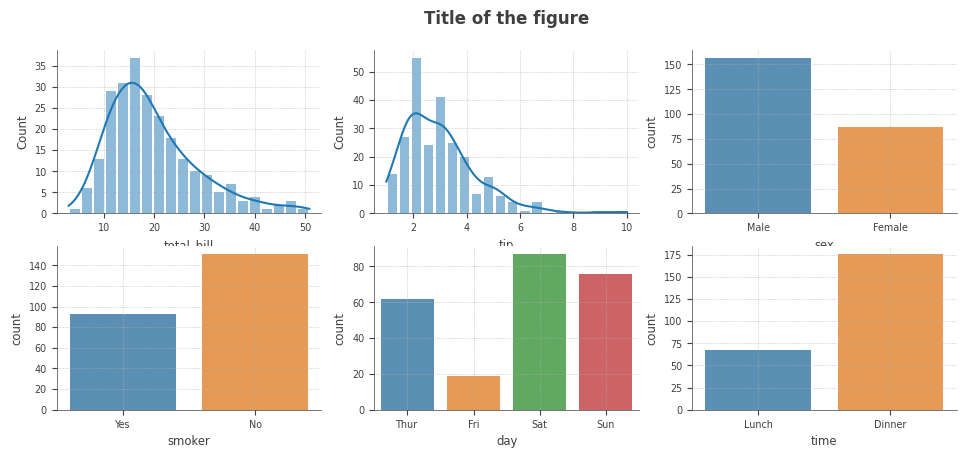

In [46]:
nrows=2; ncols=3
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,4))
fig.suptitle('Title of the figure',color='#3f3f3f', y=1.05, fontweight='bold', fontsize='large')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)

sns.histplot(ax=ax[0, 0], data=df_tips, x='total_bill', kde=True, bins=20, cumulative=False, label="total_bill", shrink=0.8, edgecolor=None,);
sns.histplot(ax=ax[0, 1], data=df_tips, x='tip', kde=True, bins=20, cumulative=False, label="tip", shrink=0.8, edgecolor=None);
sns.countplot(ax=ax[0, 2], data=df_tips, x='sex', alpha=0.8, orient='h');
sns.countplot(ax=ax[1, 0], data=df_tips, x='smoker', alpha=0.8, orient='h');
sns.countplot(ax=ax[1, 1], data=df_tips, x='day', alpha=0.8, orient='h');
sns.countplot(ax=ax[1, 2], data=df_tips, x='time', alpha=0.8, orient='h');

for i in range(nrows):
    for j in range(ncols):
        ax[i, j].set_xlabel(ax[i, j].get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
        ax[i, j].set_ylabel(ax[i, j].get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
    #     ax[i, j].set_title('Title of ' + i, loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
        ax[i, j].set_xlim(xmin=None, xmax=None)
    #     ax[i, j].legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
    #     ax[i, j].legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
        ax[i, j].grid(axis="both", lw=0.5, ls=':')
        ax[i, j].spines[['right', 'top']].set_visible(False)
        ax[i, j].spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax[i, j].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax[i, j].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

## Plot as figure: displot, relplot, lmplot & facetgrids

### Displot > histrograms

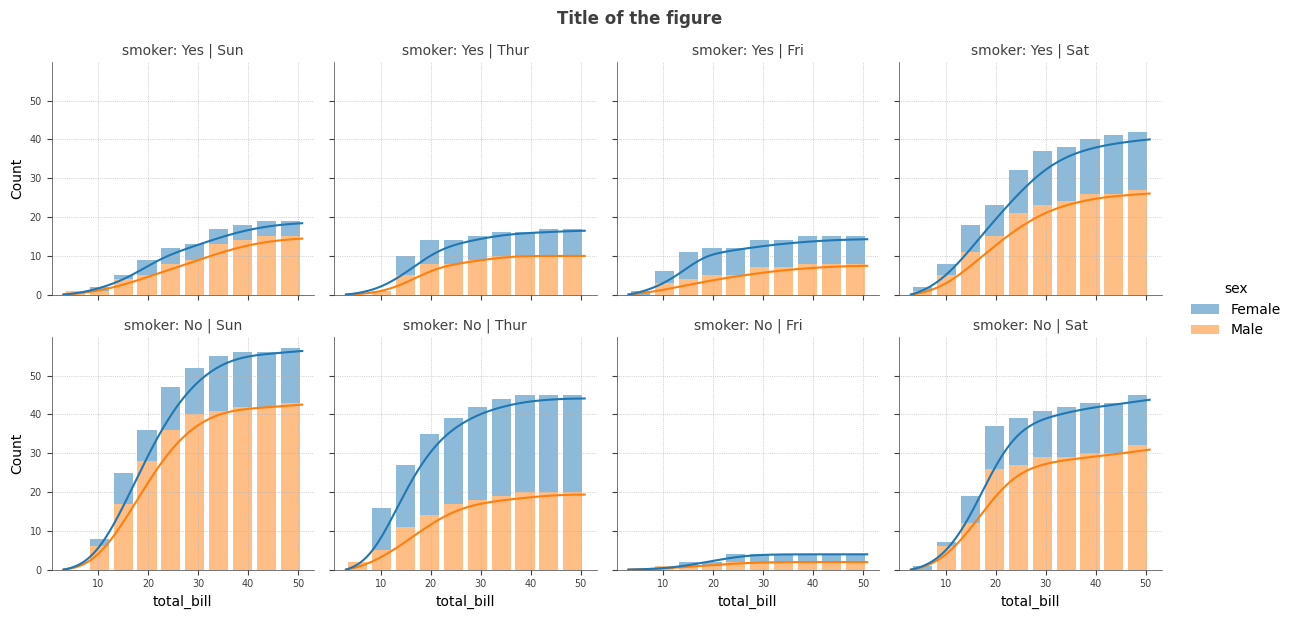

In [61]:
fg = sns.displot(data=df_tips, 
            x='total_bill',
            hue='sex', hue_order=['Female', 'Male'], multiple='stack', # {“layer”, “dodge”, “stack”, “fill”}
            col='day', col_order=['Sun', 'Thur', 'Fri', 'Sat'], 
            row='smoker', row_order=['Yes', 'No'],
            kind='hist', kde=True, bins=10, cumulative=True, 
            shrink=0.8, edgecolor=None,
            height=3, aspect=1,
           );

fg.fig.suptitle('Title of the figure',color='#3f3f3f', y=1.03, fontweight='bold', fontsize='large')
fg.set_titles(col_template='{col_name}', row_template='smoker: {row_name}', fontdict=dict(fontsize='medium', color='#3f3f3f'))

for row in fg.axes:
    for ax in row:
        ax.grid(axis="both", lw=0.5, ls=':')
        ax.spines[['right', 'top']].set_visible(False)
        ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small');

### Relplot > scatter

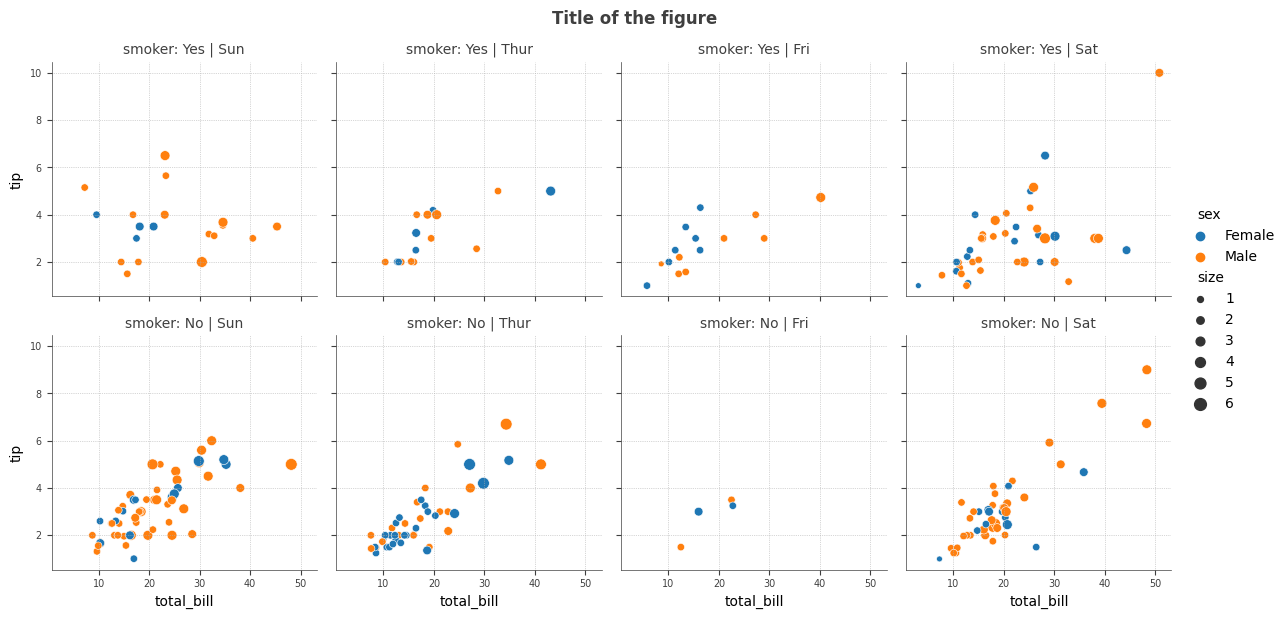

In [59]:
fg = sns.relplot(data=df_tips, 
            x='total_bill', y='tip', 
            size='size', sizes=None, size_order=None, size_norm=None,
            hue='sex', hue_order=['Female', 'Male'], hue_norm=None,
            col='day', col_wrap=None, col_order=['Sun', 'Thur', 'Fri', 'Sat'], 
            row='smoker', row_order=['Yes', 'No'],
            kind='scatter', markers='x',
            height=3, aspect=1,
           );

fg.fig.suptitle('Title of the figure',color='#3f3f3f', y=1.03, fontweight='bold', fontsize='large')
fg.set_titles(col_template='{col_name}', row_template='smoker: {row_name}', fontdict=dict(fontsize='medium', color='#3f3f3f'))

for row in fg.axes:
    for ax in row:
        ax.grid(axis="both", lw=0.5, ls=':')
        ax.spines[['right', 'top']].set_visible(False)
        ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small');

### LMplot > linear regression

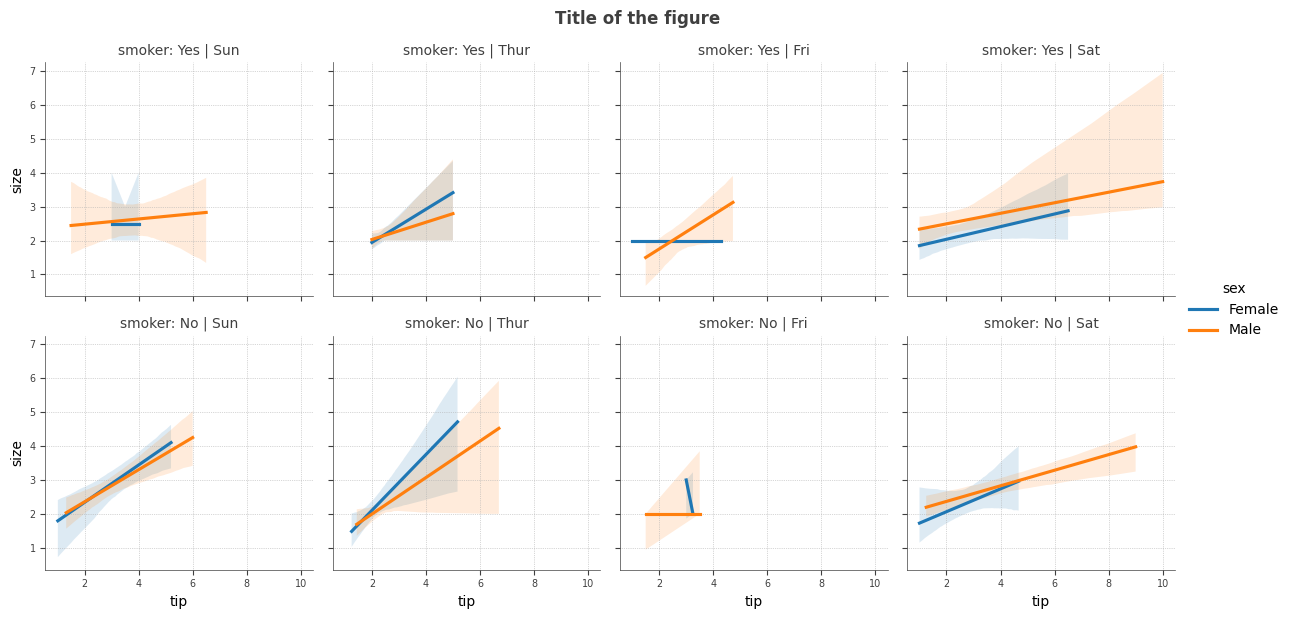

In [110]:
fg = sns.lmplot(data=df_tips, 
            x='tip', y='size',
            hue='sex', hue_order=['Female', 'Male'], 
            col='day', col_wrap=None, col_order=['Sun', 'Thur', 'Fri', 'Sat'], 
            row='smoker', row_order=['Yes', 'No'],
            ci=95,
            x_jitter=None, y_jitter=None, 
            scatter=False, markers='.', height=3, aspect=1,
           );

fg.fig.suptitle('Title of the figure',color='#3f3f3f', y=1.03, fontweight='bold', fontsize='large')
fg.set_titles(col_template='{col_name}', row_template='smoker: {row_name}', fontdict=dict(fontsize='medium', color='#3f3f3f'))

for row in fg.axes:
    for ax in row:
        ax.grid(axis="both", lw=0.5, ls=':')
        ax.spines[['right', 'top']].set_visible(False)
        ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small');

### FacetGrid (whatever simple plot)

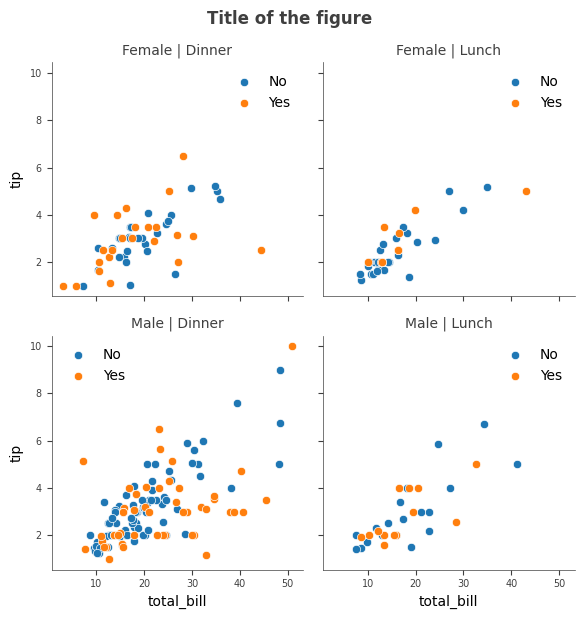

In [44]:
##### Figure and data
fg = sns.FacetGrid(data=df_tips, col='time', row='sex',
                   col_order=['Dinner', 'Lunch'], 
                   row_order=['Female', 'Male'],
                   hue='smoker', hue_order=['No', 'Yes'],
                  )
fg.map(sns.scatterplot, "total_bill", "tip");                

fg.fig.suptitle('Title of the figure',color='#3f3f3f', y=1.03, fontweight='bold', fontsize='large')

##### Style
fg.set_titles(col_template='{col_name}', row_template='{row_name}', fontdict=dict(fontsize='medium', color='#3f3f3f'))
for row in fg.axes:
    for ax in row:
        ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
        ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
#         ax.grid(axis="both", lw=0.5, ls=':')
        ax.spines[['right', 'top']].set_visible(False)
        ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

# 2D plots

## Evolution / lines

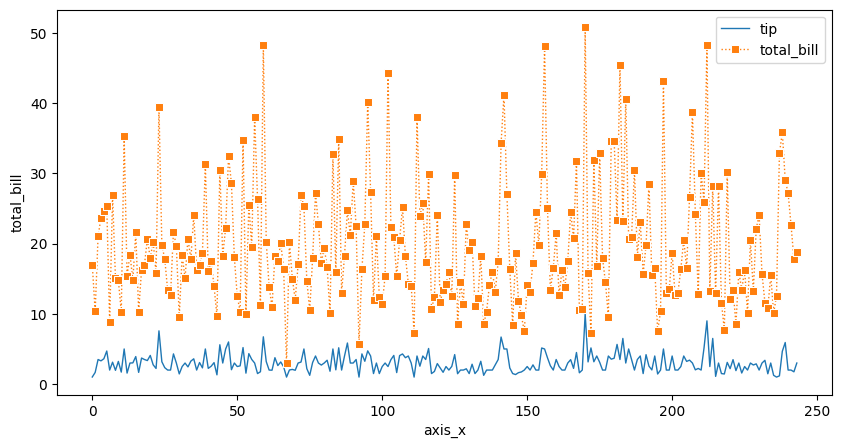

In [8]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

ax.plot(df_tips['axis_x'], 
        df_tips['tip'], 
        label="tip", 
        ls='-', lw='1', marker=''
       );

sns.lineplot(data=df_tips, 
             x='axis_x', 
             y='total_bill', 
             label="total_bill", 
             ls=':', lw='1', marker='s', 
             ax=ax);

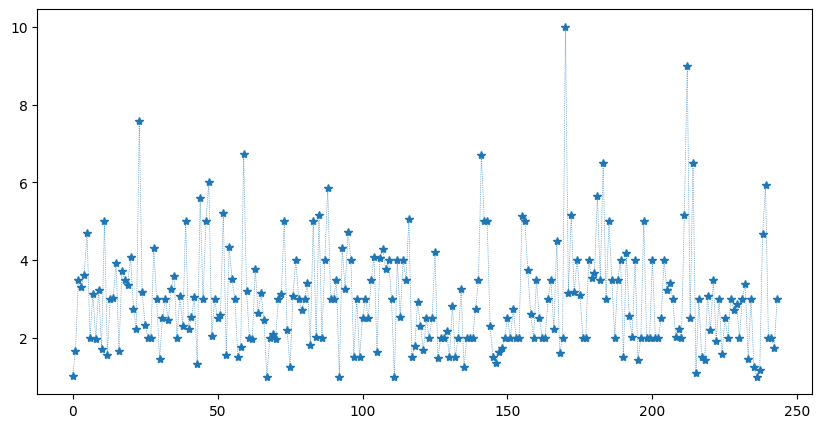

In [9]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

df_tips['tip'].plot(ls=':', lw='0.5', marker='*', ax=ax);

## Count

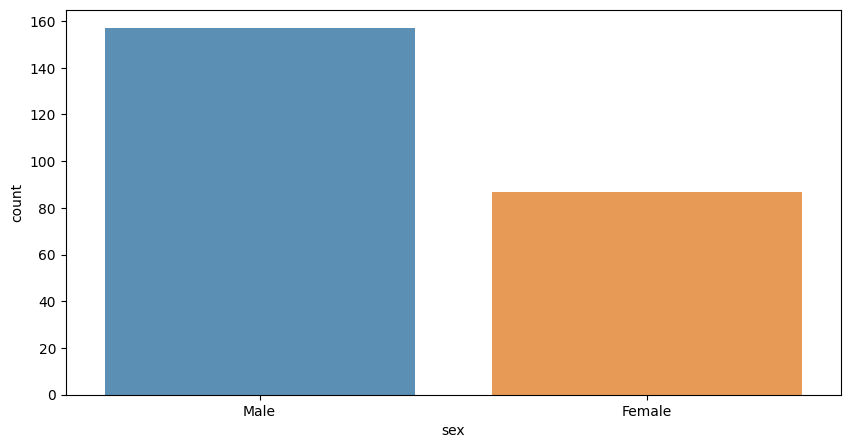

In [4]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

sns.countplot(data=df_tips, 
              x='sex', 
#               hue='day', 
              alpha=0.8, orient='h', 
              ax=ax);

## Distribution / hist, kde, box, boxen, violin

In [11]:
# plt.hist2d()
# plt.colorbar()
# sns.barplot() # eq. catplot(kind=“bar”)

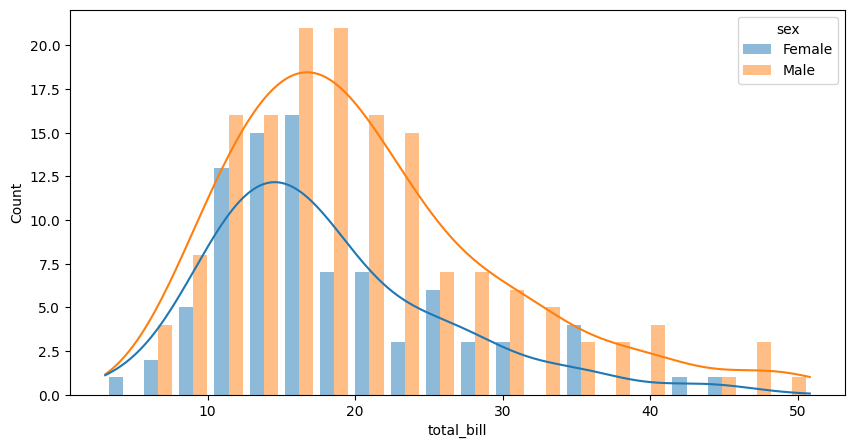

In [12]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

sns.histplot(data=df_tips, 
             x='total_bill', 
             hue='sex', hue_order=['Female', 'Male'], multiple='dodge', # {“layer”, “dodge”, “stack”, “fill”}
             kde=True, bins=20, cumulative=False, 
             label="total_bill",
             shrink=0.8, edgecolor=None,
             ax=ax);

<AxesSubplot:xlabel='tip', ylabel='day'>

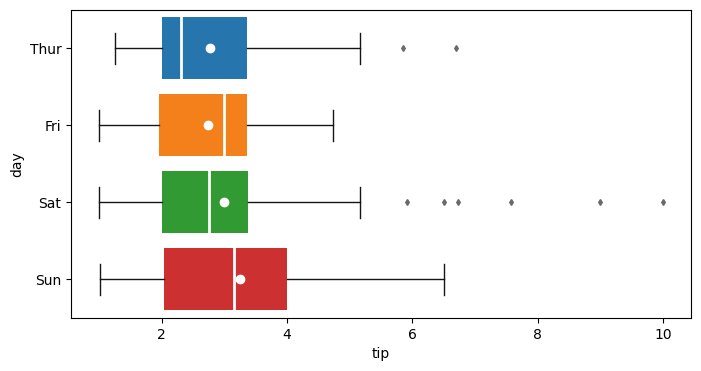

In [13]:
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot()

sns.boxplot(data=df_tips, 
            x="tip", 
            y="day",
#             hue='smoker', dodge=True, width=0.8,

            orient='h', saturation=0.9, 

            showmeans=True,
            meanprops=dict(markerfacecolor='w', markeredgecolor='w', marker='o'),
            medianprops=dict(color='w', alpha=1, linewidth=2),

            boxprops=dict(linewidth=False),
            whiskerprops=dict(color='#151515', linewidth=1),
            capprops=dict(color='#151515', linewidth=1),
            showfliers=True, fliersize=3,
            flierprops=dict(markerfacecolor='#6a6a6a', markeredgecolor='#6a6a6a', marker='d'),
            
            ax=ax)

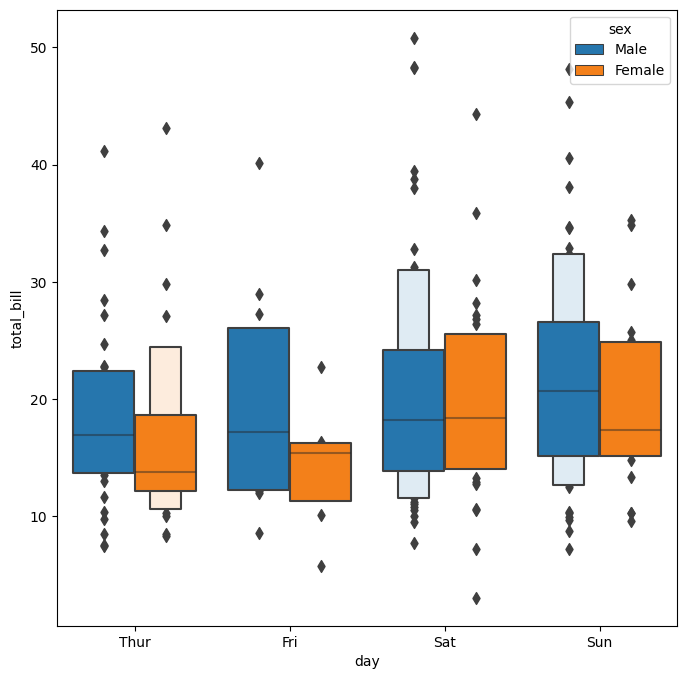

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()

sns.boxenplot(data=df_tips,
              x='day',
              y='total_bill',
              hue='sex',
              orient='v', 
              saturation=0.9, 
              linewidth=1.5, 
              showfliers=True,
              ax=ax);

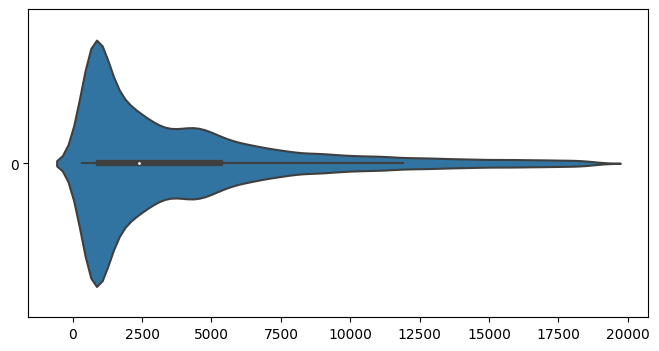

In [15]:
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot()

sns.violinplot(data=df_diam['price'], 
               orient='h', 
               showcaps=False,
               widths=0.06,
               patch_artist=True,
               boxprops=dict(color="indigo", facecolor="indigo"),
               whiskerprops=dict(color="indigo", linewidth=2),
               medianprops=dict(color="w", alpha=1, linewidth=10),
               alpha=0.7, 
               ax=ax);

## Relation / scatter, regplot, pairplot, joinplot, heatmap

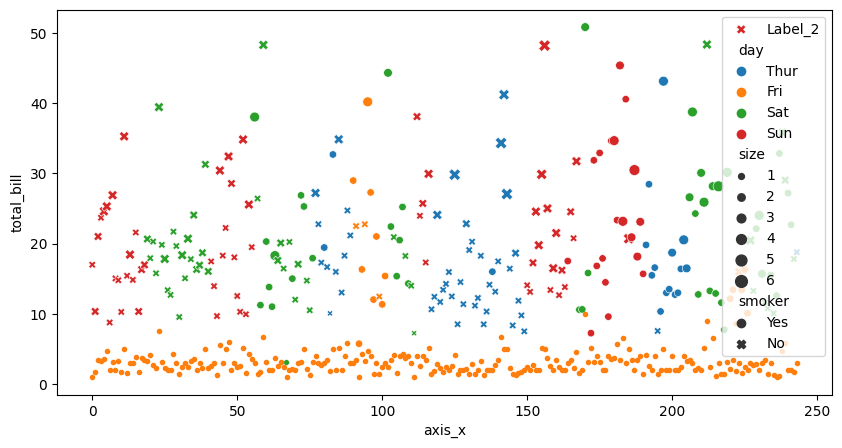

In [16]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

sns.scatterplot(data=df_tips, 
                x='axis_x', 
                y='total_bill', 
                hue='day',
                size='size',
                style='smoker', 
                label="Label_2", 
                ax=ax);

ax.scatter(df_tips['axis_x'], 
           df_tips['tip'], 
           label="tip", 
           marker='.');

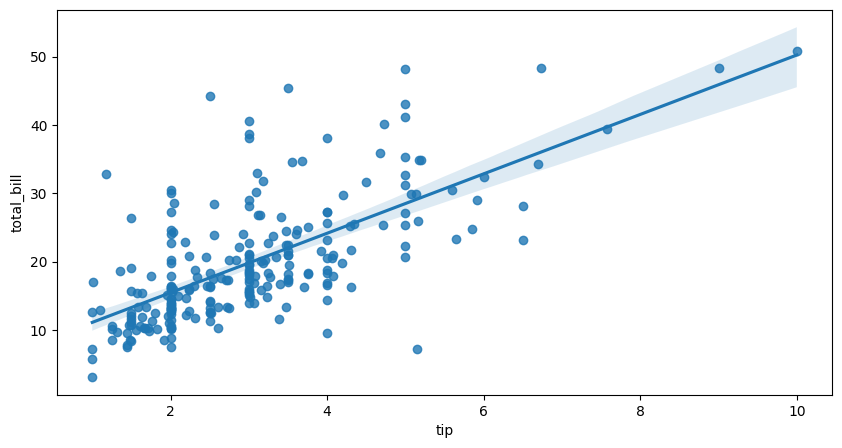

In [88]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

sns.regplot(data=df_tips,
            x='tip', 
            y='total_bill',
            ci=95,
            label="label",
#             x_jitter=0.2, # used for discrete variable to better see data
#             y_jitter=0, # used for discrete variable to better see data
            ax=ax);

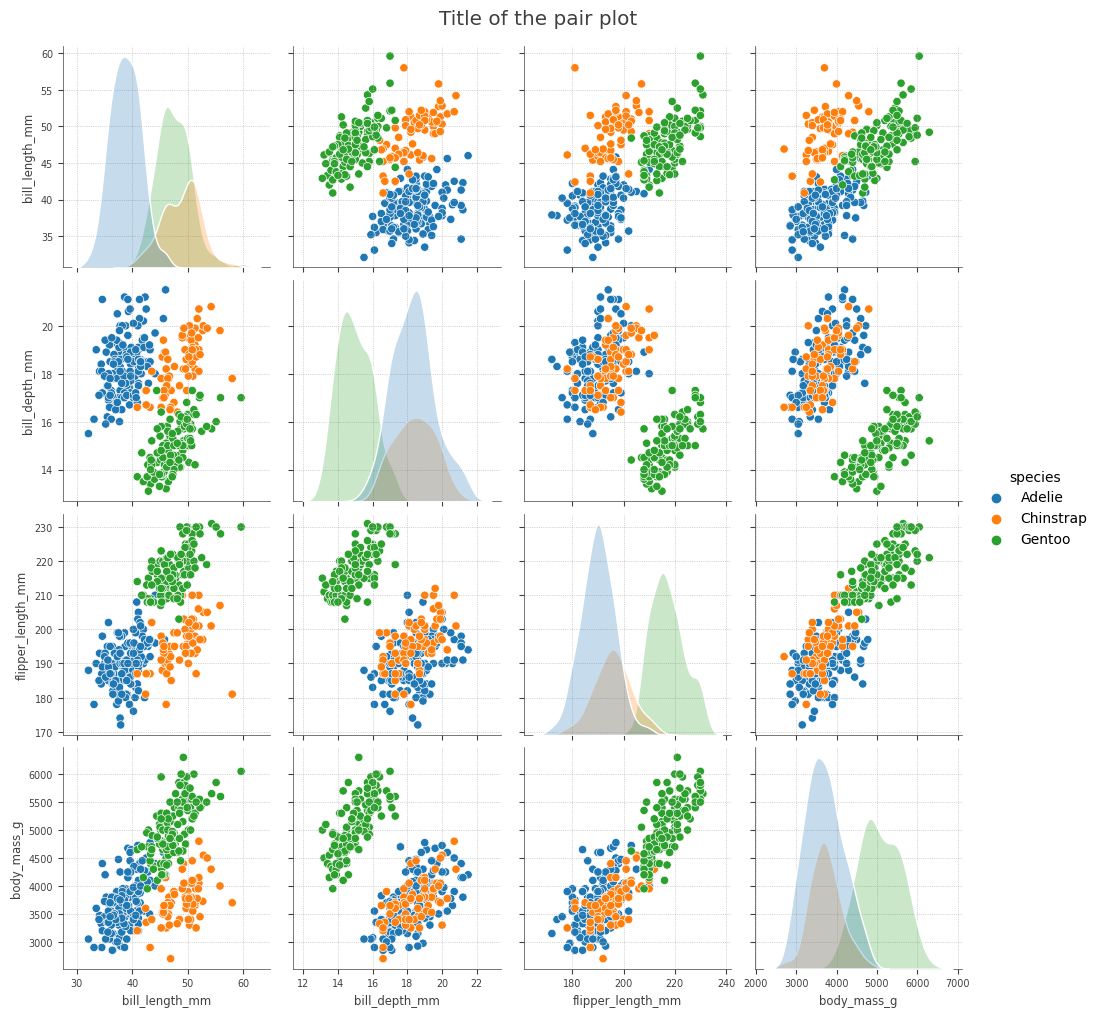

In [15]:
### THIS IS A PLOT AS A FIGURE. IT SHOULD NOT BE PLACED IN AN AXE STRUCTURE

##### Figure and data
pp = sns.pairplot(data=df_penguins, 
                  hue="species",
                  diag_kind='auto', # ‘auto’, ‘hist’, ‘kde’, None
                  kind='scatter', # ‘scatter’, ‘kde’, ‘hist’, ‘reg’
                  diag_kws={'edgecolor':'w'},
                  markers='o',
                  corner=False);

##### Title
pp.fig.suptitle('Title of the pair plot', color='#3f3f3f', y=1.02, fontweight='normal', fontsize='x-large');

for ax in pp.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
        ax.set_ylabel(ax.get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
        #ax.set_xlim(xmin=None, xmax=None)
        #ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
        #ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
        ax.grid(axis="both", lw=0.5, ls=':')
        ax.spines[['right', 'top']].set_visible(False)
        ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
        ax.tick_params(axis='both', colors='#3f3f3f', labelsize='x-small')

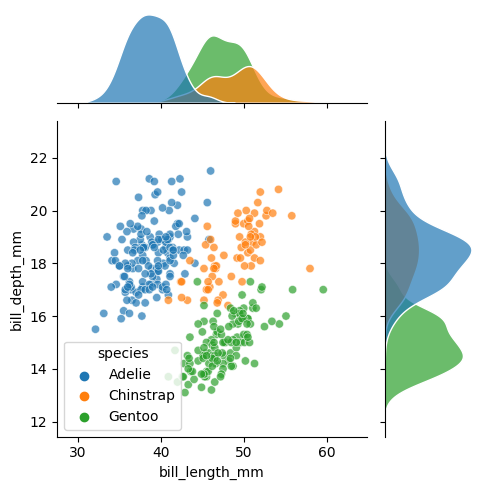

In [19]:
sns.jointplot(data=df_penguins, 
              x="bill_length_mm", 
              y="bill_depth_mm",
              hue="species",
              kind='scatter', # “scatter” | “kde” | “hist” | “hex” | “reg” | “resid”
              joint_kws=dict(marker='o'),
              marginal_kws=dict(edgecolor='w', fill=True, alpha=0.7),
              marginal_ticks=False,
              height=5, ratio=3, space=0.2, alpha=0.7,
              ax=ax);

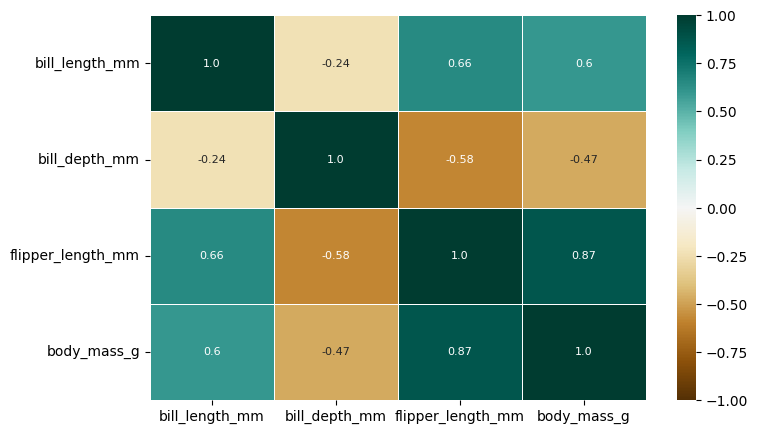

In [10]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot()

sns.heatmap(df_penguins.corr(),
            vmin=-1, vmax=1, 
            cmap='BrBG',
            annot=True, fmt='.2',
            annot_kws = {"fontsize":8},
            square=False, cbar=True, cbar_kws=dict(orientation='vertical'),
            linewidths=0.5, linecolor='w',
            ax=ax);

In [73]:
fig = px.scatter(df_tips, x="size", y="tip", color="day")
fig.show()

## 2D Projections

In [120]:
# plt.contour(X,Y,Z) # iso lines
# plt.contourf(X,Y,Z=f(X,Y)) # area colors

# Colors

https://coolors.co/

In [121]:
### Green and Orange
caribbean_current= '#156064ff'
mint= '#00c49aff'
naples_yellow= '#f8e16cff'
melon= '#ffc2b4ff'
coral= '#fb8f67ff'
greens_oranges=[caribbean_current, mint, naples_yellow, melon, coral]

### Fluo
malachite= '#04e762ff'
selective_yellow= '#f5b700ff'
mexican_pink= '#dc0073ff'
bleu_de_france= '#008bf8ff'
chartreuse= '#89fc00ff'
fluos = [malachite, selective_yellow, mexican_pink, bleu_de_france, chartreuse]

### Blues
oxford_blue = '#00072dff'
penn_blue = '#001c55ff'
royal_blue_traditional = '#0a2472ff'
bice_blue = '#0e6ba8ff'
non_photo_blue = '#a6e1faff'
blues = [oxford_blue, penn_blue, royal_blue_traditional, bice_blue, non_photo_blue]

### Greys
grey_xx_light='#bebebe'
grey_x_light='#949494'
grey_medium='#6a6a6a'
grey_x_dark='#3f3f3f'
grey_xx_dark='#151515'

### Ocres & greens
hunyadi_yellow= '#edae49ff'
amaranth= '#d1495bff'
caribbean_current= '#00798cff'
lapis_lazuli= '#30638eff'
indigo_dye= '#003d5bff'
ocres_greens=[hunyadi_yellow, amaranth, caribbean_current, lapis_lazuli, indigo_dye]

### Pastel Blue and Orange
true_blue= '#586ba4ff'
marian_blue= '#324376ff'
flax= '#f5dd90ff'
atomic_tangerine= '#f68e5fff'
bittersweet= '#f76c5eff'
blues_oranges=[true_blue, marian_blue, flax, atomic_tangerine, bittersweet]

### Pink & lavande
mimi_pink= '#edd2e0ff'
tea_rose_red= '#edbbb4ff'
pink_lavender= '#dbabbeff'
rose_quartz= '#baa1a7ff'
gray= '#797b84ff'
pinks_lavandes= [mimi_pink, tea_rose_red, pink_lavender, rose_quartz, gray]

# 3D Visualisation

In [111]:
fig = px.scatter_3d(df_diam, 
                    x = 'carat',
                    y = 'depth',
                    z = 'price',
                    opacity=0.7, width=500, height=500,
                    color = 'clarity',
           )
fig.show()

# less usefull

In [122]:
##### Axis' limits & ticks values
# ax['A'].set_xticks([value_x1, value_x2], ["display_1", "display_2"], rotation=20)
# ax['A'].set_yticks([value_y1, value_y2], rotation=20)

##### Annotation
# ax['A'].annotate('annotation_text', (end_x, end_y), (start_x, start_y), arrowprops={"arrowstyle":"->"})